# test de validation

In [24]:
%matplotlib inline
import os
import json

os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [34]:
def ocr_treatment(img_path):
	doc = DocumentFile.from_images(img_path)
	predictor = ocr_predictor(pretrained=True)
	result = predictor(doc)
	return result

def ocr_display(result):
	synthetic_pages = result.synthesize()
	# plt size
	plt.figure(figsize=(15, 15))
	plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()
	
	
def extract_text_blocks(json_data):
    text_blocks = []
    for page in json_data["pages"]:
        for block in page["blocks"]:
            text = ""
            for line in block["lines"]:
                for word in line["words"]:
                    text += word["value"] + " "
            text_blocks.append(text.strip())
    return text_blocks


def ocr_display_text(result):
	json_data = result.export()
	text_blocks = extract_text_blocks(json_data)
	for i, block in enumerate(text_blocks, start=1):
		print(f"Block {i}: {block}")
	
	
def save_json(result):
	with open('result.json', 'w') as f:
		f.write(json.dumps(result.export()))

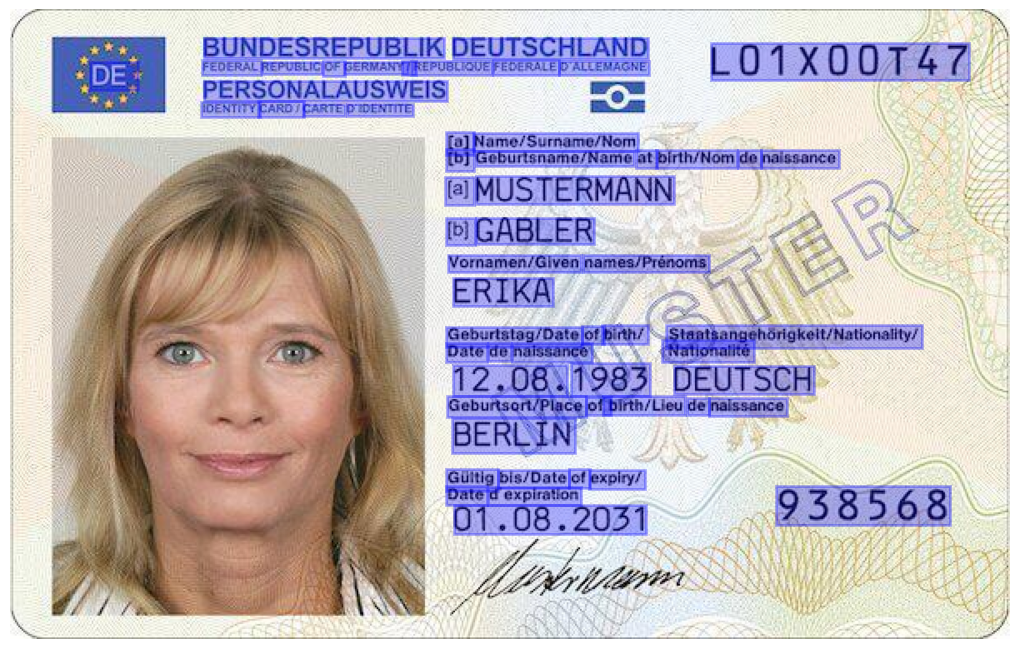

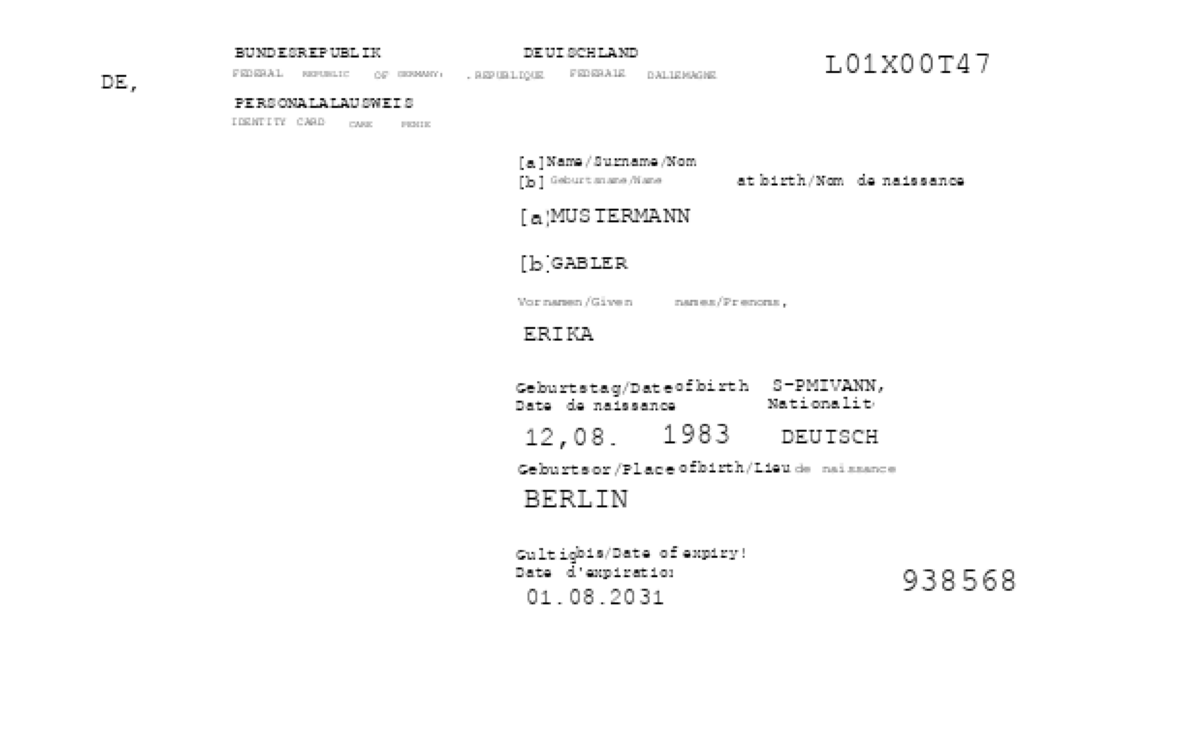

Text Block 1: BUNDESREPUBLIK DEUISCHLAND FEDERAL REPUBLIC OF GERMANY: . REPUBLIQUE FEDERALE DALLEMAGNE
Text Block 2: DE,
Text Block 3: L01X00T47
Text Block 4: PERSONALALAUSWEIS IDENTITY CARD CARE PENIE
Text Block 5: [a] Name/Surname/Nom
Text Block 6: [b] Geburtsname/Name at birth/Nom de naissance
Text Block 7: [a) MUSTERMANN
Text Block 8: [b] GABLER
Text Block 9: Vornamen/Given names/Prenoms,
Text Block 10: ERIKA
Text Block 11: Geburtstag/Date, of birth/ S-PMIVANN,
Text Block 12: Date de naissance
Text Block 13: Nationalité
Text Block 14: 12,08. 1983 DEUTSCH Geburtsor/Place of1 birth/Lieu de naissance
Text Block 15: BERLIN
Text Block 16: Gultig bis/Date of expiry! Date d'expiration 01.08.2031
Text Block 17: 938568


In [33]:
img_path = 'img02.jpg'
result = ocr_treatment(img_path)
result.show()
ocr_display(result)
ocr_display_text(result)
save_json(result)